Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;

данные о видео из трендов YouTube;

данные об уровне счастья в разных странах;

данные по фильмам и сериалам Netflix.

In [114]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [11]:
#Прочтем файл - уровень счастья по странам за 2019 год
happiness_level = pd.read_csv('2019.csv')
happiness_level.head()
happiness_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [29]:
#Отфильтруем датафрейм
happiness_level_2 = happiness_level.filter(items = ['Country or region', 'Score', 'GDP per capita',  'Social support',
                                                    'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
                                                    'Perceptions of corruption'])


happiness_level_2.columns = ['Страна', 'Уровень счастья', 'ВВП на душу населения',  'Соц поддержка', 'ЗОЖ',
                             'Свобода выбора', 'Благотворительность', 'Коррупция']
happiness_level_2. head()


,Страна,Уровень счастья,ВВП на душу населения,Соц поддержка,ЗОЖ,Свобода выбора,Благотворительность,Коррупция
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [30]:
happiness_level_2.describe()

,Уровень счастья,ВВП на душу населения,Соц поддержка,ЗОЖ,Свобода выбора,Благотворительность,Коррупция
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


ГРАФИК 1. Зависимость уровня благотворительности от уровня счастья


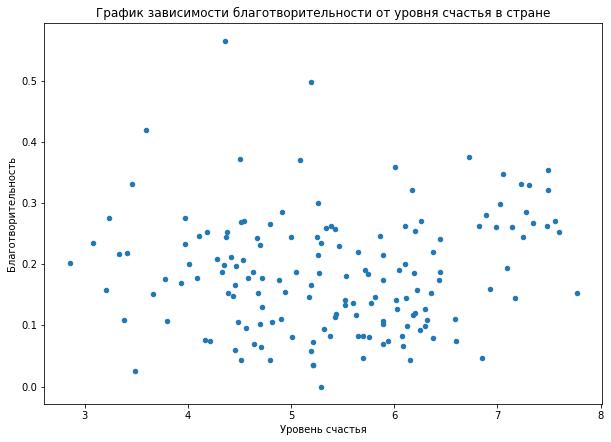

In [31]:
happiness_level_2.plot(kind='scatter', y='Благотворительность', x='Уровень счастья', 
        title='График зависимости благотворительности от уровня счастья в стране')
plt.show()

In [32]:
# На графике видно, что в основном благотворительностью занимаются те страны, где уровень счастья находиться
#на среднем уровне, страны с вясоким уровнем счасть склонны делать более высокие пожертвования

ГРАФИК 2. График уровня ввп на душу населения для стран Большой семерки и России

In [92]:
russia = happiness_level_2[ (happiness_level_2['Страна']=='Russia')]
russia

,Страна,Уровень счастья,ВВП на душу населения,Соц поддержка,ЗОЖ,Свобода выбора,Благотворительность,Коррупция
67,Russia,5.648,1.183,1.452,0.726,0.334,0.082,0.031


In [91]:
#отсортируем датафрейм по странам Большой семерки
big_seven = happiness_level_2[ (happiness_level_2['Страна']=='France') | (happiness_level_2['Страна']=='Germany')
                       | (happiness_level_2['Страна']=='Italy') | (happiness_level_2['Страна']=='Japan')
                       | (happiness_level_2['Страна']=='United Kingdom') | (happiness_level_2['Страна']=='United States')
                       | (happiness_level_2['Страна']=='Canada')]
big_seven



,Страна,Уровень счастья,ВВП на душу населения,Соц поддержка,ЗОЖ,Свобода выбора,Благотворительность,Коррупция
8,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
14,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278
16,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265
18,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
23,France,6.592,1.324,1.472,1.045,0.436,0.111,0.183
35,Italy,6.223,1.294,1.488,1.039,0.231,0.158,0.030
57,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140


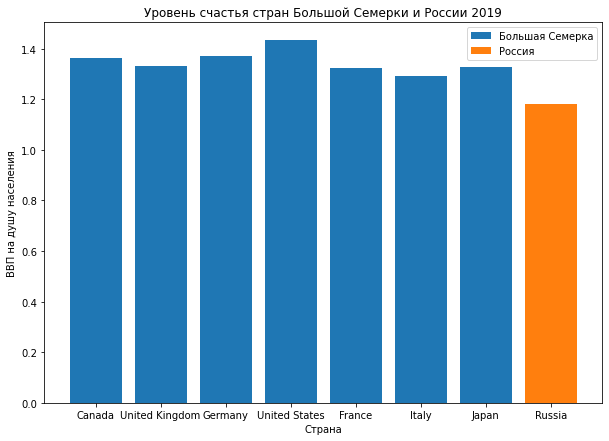

In [99]:


data_b7_rus = [big_seven, russia]
for country in data_b7_rus:
    plt.bar(country['Страна'],country['ВВП на душу населения'])
    plt.title('Уровень счастья стран Большой Семерки и России 2019')
    plt.xlabel('Страна')
    plt.ylabel('ВВП на душу населения')
    plt.legend(['Большая Семерка', 'Россия'])

In [ ]:
# На графике видно, что ВВП России ниже показателей Большой семерки, 
# определяющее влияние на индекс счастья в стране иммет ВВП 

ГРАФИК 3. Уровень коррупции в мире в 2019

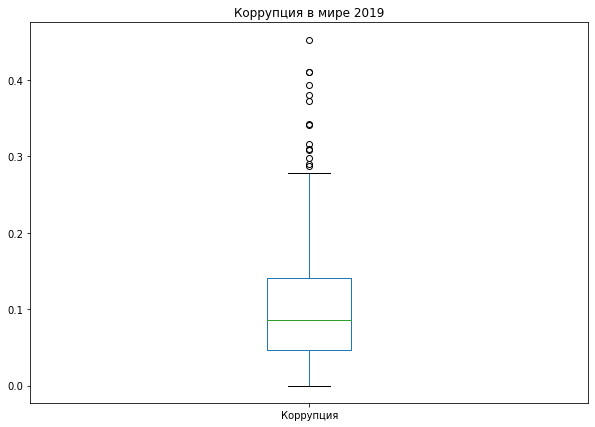

In [107]:
happiness_level_2['Коррупция'].plot(kind='box', title='Коррупция в мире 2019')                                  

In [108]:
# Этот график показывает нам что коррупция в странах мира есть , 
# есть страны в которых данный показатель находится на высоком уровне, но таких стран не так ух и много,
#в целом можно сказать что мир против коррупции, все показатели смещены в сторону низких показателей

ГРАФИК 4. Тепловая карта взаимодействия показателей в странахмира

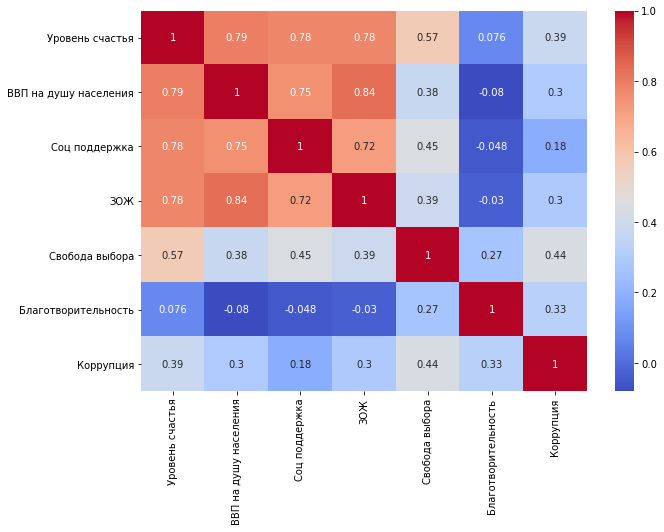

In [123]:

sns.heatmap(happiness_level_2.corr(), cmap='coolwarm', annot=True)

In [ ]:
#Из графика видно, что самую высокую кореляционную зависимость имеют ЗОЖ и ВВП
# А так же, что Индекс счастья имеет высокую степень корреляции с ЗОЖ , ВВП и соц поддержкой
#экономическое развитие, ожидаемая продолжительность жизни, и уровень социальной поддержки в странах  
# имеют положительное влияние на оценку счастья населения